In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [16]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y')

df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021


In [17]:
monthly_sales = df.groupby(['year', 'month'])['price'].sum()

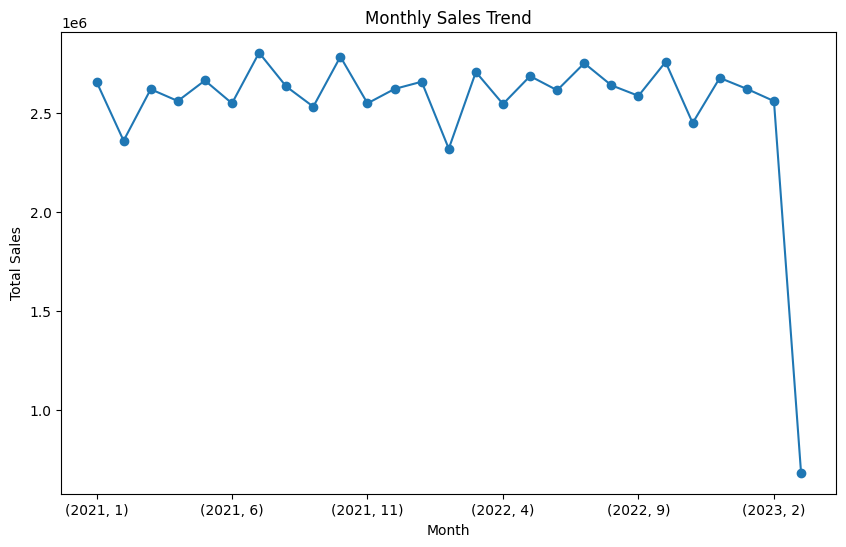

In [21]:
plt.figure(figsize=(10,6))
monthly_sales.plot(marker = 'o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [25]:
customer_demographics = df.groupby('gender').agg({'age' : ['mean', 'median'], 'customer_id':'nunique'})
customer_demographics

age        customer_id
             mean median     nunique
gender                              
Female  43.453515   43.0       59482
Male    43.387767   43.0       39975

In [27]:
category_sales = df.groupby('category')[['quantity', 'price']].sum()
category_sales

,quantity,price
category,,
Books,14982,226977.30
Clothing,103558,31075684.64
Cosmetics,45465,1848606.90
Food & Beverage,44277,231568.71
Shoes,30217,18135336.89
Souvenir,14871,174436.83
Technology,15021,15772050.00
Toys,30321,1086704.64


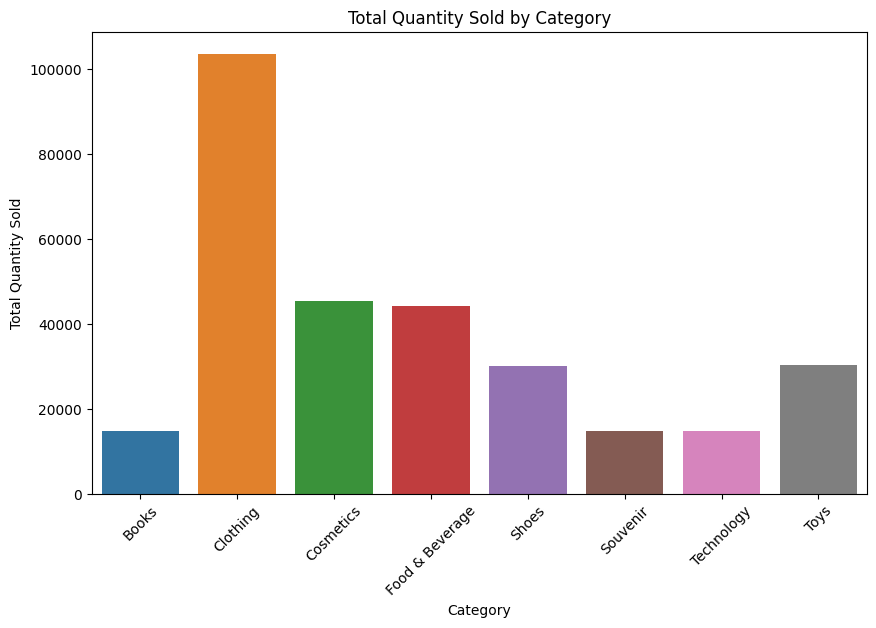

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales['quantity'])
plt.title('Total Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

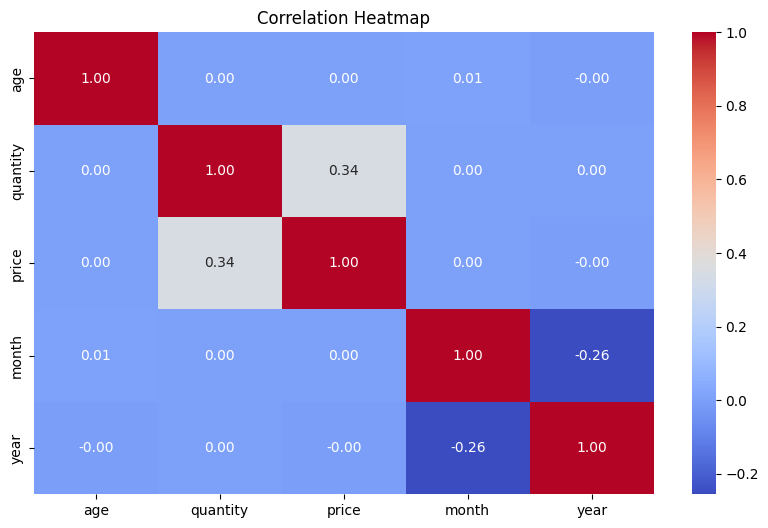

In [30]:
numeric_columns = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [34]:
top_categories = category_sales.sort_values(by='quantity', ascending=False).head(3).index.tolist()
top_categories

['Clothing', 'Cosmetics', 'Food & Beverage']

In [36]:
preferred_payment = df['payment_method'].mode()[0]
preferred_payment

'Cash'